## Clustering and exploring restaurants in Indian Cities

This notebook is part of my final project for the Applied Data Science course on Coursera by IBM.
For this project, I will be using data available of cities in India based on population. This dataset contains latitude and longitude values. These values are need to scrape venue data needed from the FourSquare API.

It will be done in the following steps : 
Section 1 - 
Section 2 -


In [1]:
import numpy as np
import pandas as pd

In [3]:
cd

C:\Users\Riona Almeida


In [4]:
df_ind = pd.read_csv("Documents\Git\Coursera_Capstone\Coursera_Capstone\indiancities.csv")
df_ind

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Mumbai,18.987807,72.836447,India,IN,Mahārāshtra,admin,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,IN,Tamil Nādu,admin,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,IN,Karnātaka,admin,6787000.0,5104047.0
5,Hyderabad,17.384052,78.456355,India,IN,Andhra Pradesh,admin,6376000.0,3597816.0
6,Ahmadābād,23.025793,72.587265,India,IN,Gujarāt,minor,5375000.0,3719710.0
7,Hāora,22.576882,88.318566,India,IN,West Bengal,NaN,4841638.0,1027672.0
8,Pune,18.513271,73.849852,India,IN,Mahārāshtra,NaN,4672000.0,2935744.0
9,Sūrat,21.195944,72.830232,India,IN,Gujarāt,NaN,3842000.0,2894504.0


### Displaying cities extracted on map

For this purpose, I will use geopy package to retreive coordinated of India and folium to map all the cities. 

In [5]:
from geopy.geocoders import Nominatim

In [6]:
address = 'India'

locator = Nominatim(user_agent='india')
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("coordinates are : {},{}".format(latitude,longitude))

coordinates are : 22.3511148,78.6677428


In [7]:
import folium

In [8]:
#map of India 
india_map = folium.Map(location=[latitude,longitude],zoom_start=5)

#adding markers
for lat, lng, city in zip(df_ind['lat'],df_ind['lng'],df_ind['city']):
    label = '{}'.format(city)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng], radius=5, popup=label, color='blue', fill=True, parse_html=False).add_to(india_map)
    
india_map

### Cleaning the data

- I found that I would not be needing the 'iso2' and 'capital' attributes from the data provided. 
- I also renamed the 'admin' column to 'state' for better understanding

In [9]:
#dropping unnecessary columns and renaming column
df_ind = df_ind.drop(columns=['iso2','capital'])
df_ind = df_ind.rename({'admin':'state'},axis='columns')
df_ind.head()

,city,lat,lng,country,state,population,population_proper
0,Mumbai,18.987807,72.836447,India,Mahārāshtra,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,Delhi,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,West Bengal,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,Tamil Nādu,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,Karnātaka,6787000.0,5104047.0


#### Finding and removal of null attributes.

In [10]:
#finding columns with null values
df_ind.isnull().any()

city                 False
lat                  False
lng                  False
country              False
state                False
population            True
population_proper     True
dtype: bool

In [11]:
df_ind = df_ind.dropna()
df_ind.head()

,city,lat,lng,country,state,population,population_proper
0,Mumbai,18.987807,72.836447,India,Mahārāshtra,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,Delhi,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,West Bengal,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,Tamil Nādu,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,Karnātaka,6787000.0,5104047.0


In [12]:
df_ind.isnull().any()

city                 False
lat                  False
lng                  False
country              False
state                False
population           False
population_proper    False
dtype: bool

In [13]:
df_ind.shape

(207, 7)

#### Thus I now have 207 cities spanned across the map of India to cluster data from.

## Section 2 : Acquiring data from FourSquare API

In [14]:
#foursquare creds

CLIENT_ID = 'XIVVLDW5DHIZYE1CJGET0T2BVYFKP4QMYB1RMIDMA2PWJIQR' # Foursquare ID
CLIENT_SECRET = 'AAEMJ5AJR5VQOX1OG5TQO342RVZNSPO1PKJ4AZYRACVFFG42' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Credentials:
CLIENT_ID: XIVVLDW5DHIZYE1CJGET0T2BVYFKP4QMYB1RMIDMA2PWJIQR
CLIENT_SECRET: AAEMJ5AJR5VQOX1OG5TQO342RVZNSPO1PKJ4AZYRACVFFG42


In [15]:
import requests

We will be using the requests package to get the values from URL. The following two functions will be used extensively to gather the data from FourSquare API.

In [16]:
# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



I am applying a limit of 100 venues for a radius of 5 KM for each city.

In [18]:
# Function that gets 100 closest venues to a postal code coordinates
def getNearbyVenues( city, latitudes, longitudes):
    
    LIMIT = 100
    venues_list=[]
    
    for  city, lat, lng in zip( city, latitudes, longitudes):
        print('Querying venues from: ', city)
        radius=5000
            
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Return only relevant information for each nearby venue
        venues_list.append([(
            city, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Neighborhood Group Latitude', 
                  'Neighborhood Group Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
#let's take only top 100 cities and analyse them

df_indtop100 = df_ind.sort_values(by=['population'],ascending=False).head(100)
df_indtop100.shape

(100, 7)

In [21]:
#getting popular venues from foursquare API

pop_venues = getNearbyVenues(city=df_indtop100['city'],latitudes=df_indtop100['lat'],
                            longitudes=df_indtop100['lng'])

pop_venues.head()

Querying venues from:  Mumbai
Querying venues from:  Delhi
Querying venues from:  Kolkata
Querying venues from:  Chennai
Querying venues from:  Bengalūru
Querying venues from:  Hyderabad
Querying venues from:  Ahmadābād
Querying venues from:  Hāora
Querying venues from:  Pune
Querying venues from:  Sūrat
Querying venues from:  Mardānpur
Querying venues from:  Rāmpura
Querying venues from:  Lucknow
Querying venues from:  Nāra
Querying venues from:  Patna
Querying venues from:  Indore
Querying venues from:  Vadodara
Querying venues from:  Bhopal
Querying venues from:  Coimbatore
Querying venues from:  Ludhiāna
Querying venues from:  Āgra
Querying venues from:  Kalyān
Querying venues from:  Vishākhapatnam
Querying venues from:  Kochi
Querying venues from:  Nāsik
Querying venues from:  Meerut
Querying venues from:  Farīdābād
Querying venues from:  Vārānasi
Querying venues from:  Ghāziābād
Querying venues from:  Āsansol
Querying venues from:  Jamshedpur
Querying venues from:  Madurai
Queryi

,City,Neighborhood Group Latitude,Neighborhood Group Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,18.987807,72.836447,The St. Regis Mumbai,18.993652,72.825220,Hotel
1,Mumbai,18.987807,72.836447,Bhau Daji Lad Museum,18.979140,72.834449,History Museum
2,Mumbai,18.987807,72.836447,High Street Phoenix,18.994967,72.825032,Shopping Mall
3,Mumbai,18.987807,72.836447,Smoke House Deli,18.994478,72.824400,Restaurant
4,Mumbai,18.987807,72.836447,Jai Hind Lunch Home,19.002183,72.829512,Seafood Restaurant


No. of venues totally acquired

In [22]:
pop_venues.shape

(3161, 7)

In [25]:
pop_venues.groupby(['City']).count().sort_values('Venue').head(10)

,Neighborhood Group Latitude,Neighborhood Group Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Bhilai,4,4,4,4,4,4
Chānda,4,4,4,4,4,4
Gopālpur,4,4,4,4,4,4
Gulbarga,4,4,4,4,4,4
Dhūlia,4,4,4,4,4,4
Morādābād,4,4,4,4,4,4
Mālegaon Camp,4,4,4,4,4,4
Bareilly,4,4,4,4,4,4
Dhanbād,4,4,4,4,4,4


In [26]:
#unique venues

print("There are {} different types of venues".format(len(pop_venues['Venue Category'].unique())))

There are 228 different types of venues


In [27]:
pop_venues.groupby(['Venue Category']).Venue.count()



Venue Category
ATM                                11
Accessories Store                   5
Afghan Restaurant                   1
African Restaurant                  1
Airport                             6
Airport Terminal                    2
American Restaurant                12
Andhra Restaurant                   4
Arcade                              5
Art Gallery                         8
Art Museum                          4
Arts & Crafts Store                 7
Asian Restaurant                   44
Athletics & Sports                  3
Australian Restaurant               1
Awadhi Restaurant                   2
BBQ Joint                          20
Bakery                             81
Bank                                1
Bar                                16
Basketball Court                    2
Beach                              11
Bed & Breakfast                     9
Beer Garden                         1
Bengali Restaurant                  3
Bike Shop                          

### Filtering only restaurants and cafes across different cities

In [34]:
pop_venues.to_excel("VenueDataInd.xlsx")

In [35]:
## after removing other venue categories

pop_eat = pd.read_excel("VenueDataInd.xlsx",'Sheet2')


In [140]:
pop_eat

,City,Neighborhood Group Latitude,Neighborhood Group Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,18.987807,72.836447,The St. Regis Mumbai,18.993652,72.825220,Hotel
1,Mumbai,18.987807,72.836447,Smoke House Deli,18.994478,72.824400,Restaurant
2,Mumbai,18.987807,72.836447,Jai Hind Lunch Home,19.002183,72.829512,Seafood Restaurant
3,Mumbai,18.987807,72.836447,Ladu Samrat,18.994526,72.836574,Maharashtrian Restaurant
4,Mumbai,18.987807,72.836447,The Irish House,18.994416,72.824721,Pub
5,Mumbai,18.987807,72.836447,Indigo Delicatessen,18.994498,72.823760,Deli / Bodega
6,Mumbai,18.987807,72.836447,Kebabs & Kurries,18.997938,72.837639,Indian Restaurant
7,Mumbai,18.987807,72.836447,The Sahib Room & Kipling Bar,18.994333,72.823850,Indian Restaurant
8,Mumbai,18.987807,72.836447,ITC Grand Central,18.998469,72.838433,Hotel
9,Mumbai,18.987807,72.836447,Francesco's,18.995435,72.824964,Pizza Place


In [36]:
#unique venues

print("There are {} different types of venues".format(len(pop_eat['Venue Category'].unique())))
pop_eat.groupby(['Venue Category']).Venue.count()

There are 98 different types of venues


Venue Category
Afghan Restaurant                    1
African Restaurant                   1
American Restaurant                 12
Andhra Restaurant                    4
Asian Restaurant                    44
Australian Restaurant                1
Awadhi Restaurant                    2
BBQ Joint                           20
Bar                                 16
Beer Garden                          1
Bengali Restaurant                   3
Bistro                               7
Breakfast Spot                      18
Brewery                              3
Buffet                               1
Burger Joint                        12
Burrito Place                        1
Cafeteria                            1
Café                               212
Cajun / Creole Restaurant            1
Chaat Place                          2
Chinese Restaurant                  47
Chocolate Shop                       1
Cocktail Bar                         1
Coffee Shop                         90
Cuban Rest

In [31]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

<BarContainer object of 98 artists>

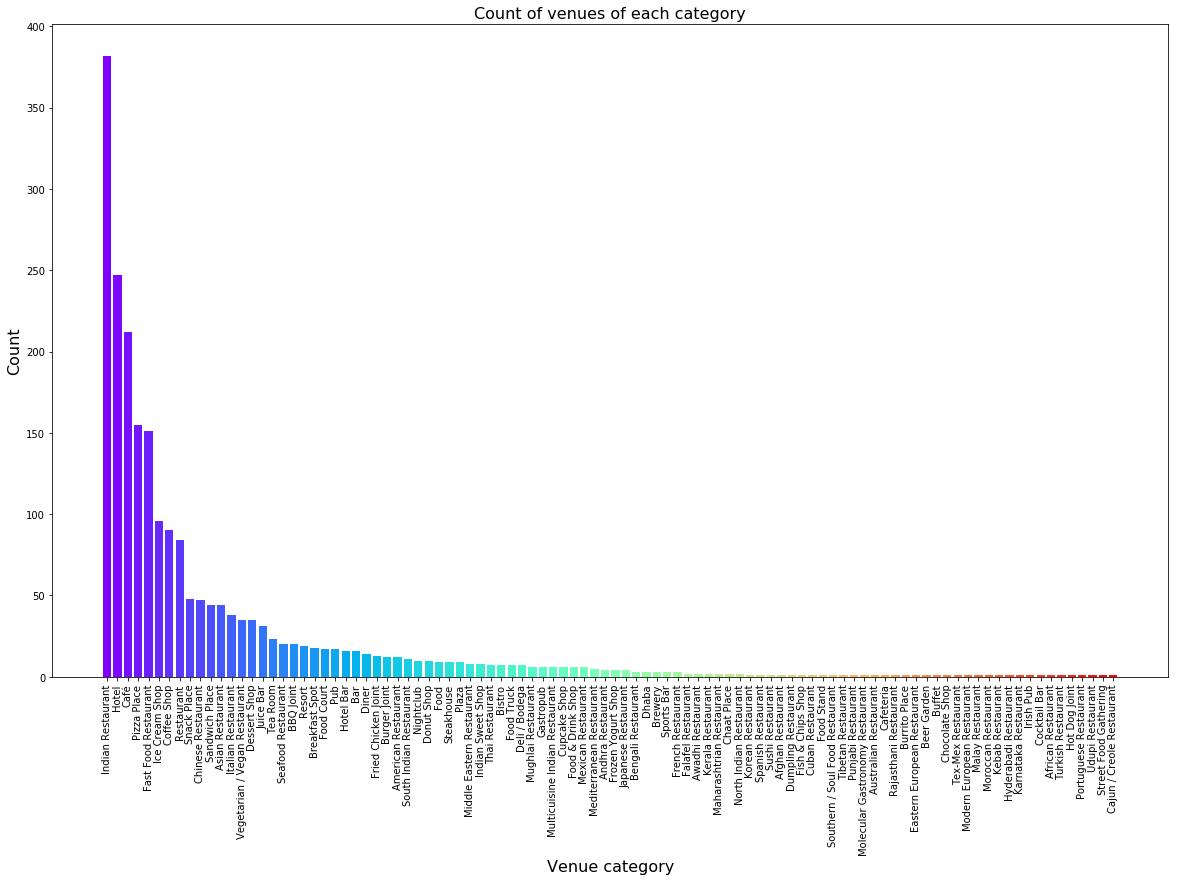

In [37]:
venue_distribution = pop_eat['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

#### From this chart we can see that  Indian Restaurants, Cafes, Pizza Places, Fast Food Restaurants and Ice Cream Shops are some of the most popular categories across the country among others.

<BarContainer object of 97 artists>

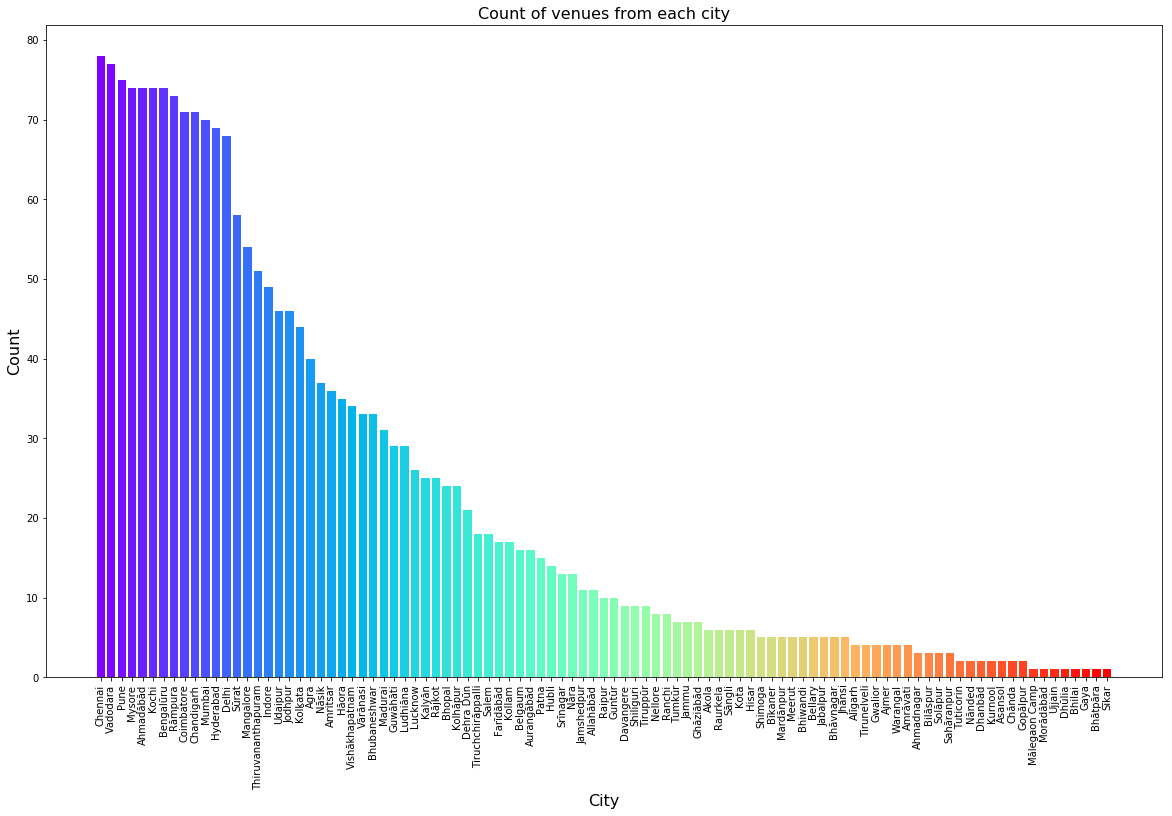

In [41]:
venue_distribution = pop_eat['City'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("City", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues from each city", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

#### From this chart, we understand that most venues were acquired from more populated cities like Chennai, Vadodara, Pune, Mysore, Mumbai, Hyderabad etc. 

## Section 3 : Preprocessing the data

Next we are going to apply One-Hot Encoding to transform the dataset into the number of venues by category for each city:


In [39]:
#One Hot Encoding
one_hot = pd.get_dummies(pop_eat[['Venue Category']],prefix="", prefix_sep="")
one_hot['City']=pop_venues['City']

fixed_columns = [one_hot.columns[-1]] + list(one_hot.columns[:-1])
one_hot = one_hot[fixed_columns]

one_hot.head()

,City,Afghan Restaurant,African Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bar,...,Steakhouse,Street Food Gathering,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by City Name and by taking the mean of the frequency of occurrence of each category:

In [40]:
group_city = one_hot.groupby('City').mean().reset_index()
group_city.head()

,City,Afghan Restaurant,African Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bar,...,Steakhouse,Street Food Gathering,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,Ahmadābād,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.010101,...,0.010101,0.00,0.0,0.050505,0.0,0.000000,0.0,0.0,0.0,0.030303
1,Allahābād,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,...,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,Amritsar,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.022222,...,0.000000,0.00,0.0,0.022222,0.0,0.022222,0.0,0.0,0.0,0.000000
3,Aurangābād,0.0,0.0,0.00,0.0,0.037037,0.0,0.0,0.00,0.000000,...,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.037037
4,Bengalūru,0.0,0.0,0.01,0.0,0.030000,0.0,0.0,0.02,0.000000,...,0.010000,0.01,0.0,0.030000,0.0,0.000000,0.0,0.0,0.0,0.020000


Next we analyse top 5 eateries from each city. We will cluster the cities based on their most popular venues.

In [42]:
#top 5 venues in each city

for n in group_city['City']:
    print("Top 5 in " +n )
    temp = group_city[group_city['City']== n].T.reset_index()
    temp.columns = ['Category','freq']
    temp=temp.iloc[1:]
    temp['freq']=temp['freq'].astype(float)
    temp=temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(5))
    print('\n')

Top 5 in Ahmadābād
               Category  freq
0     Indian Restaurant  0.13
1  Fast Food Restaurant  0.13
2           Pizza Place  0.08
3                  Café  0.07
4              Tea Room  0.05


Top 5 in Allahābād
            Category  freq
0  Indian Restaurant  0.24
1              Hotel  0.18
2        Pizza Place  0.18
3               Food  0.12
4        Snack Place  0.12


Top 5 in Amritsar
               Category  freq
0     Indian Restaurant  0.18
1  Fast Food Restaurant  0.13
2                  Café  0.11
3           Pizza Place  0.09
4                 Hotel  0.07


Top 5 in Aurangābād
            Category  freq
0  Indian Restaurant  0.19
1               Café  0.19
2              Hotel  0.19
3        Pizza Place  0.11
4        Coffee Shop  0.07


Top 5 in Bengalūru
               Category  freq
0     Indian Restaurant  0.19
1                  Café  0.13
2                 Hotel  0.09
3  Fast Food Restaurant  0.07
4          Dessert Shop  0.05


Top 5 in Bhilai
             Ca

               Category  freq
0                  Café  0.29
1     Indian Restaurant  0.11
2           Pizza Place  0.11
3  Fast Food Restaurant  0.11
4                 Hotel  0.07


Top 5 in Warangal
            Category  freq
0               Café  0.31
1  Indian Restaurant  0.15
2        Pizza Place  0.15
3              Diner  0.08
4        Coffee Shop  0.08


Top 5 in Āgra
               Category  freq
0                 Hotel  0.23
1     Indian Restaurant  0.17
2                  Café  0.15
3           Pizza Place  0.13
4  Fast Food Restaurant  0.08


Top 5 in Āsansol
               Category  freq
0     Indian Restaurant   0.4
1                 Hotel   0.2
2    Chinese Restaurant   0.2
3  Fast Food Restaurant   0.2
4    Mexican Restaurant   0.0




We will now put this data into a dataframe. Below is the function to sort venues in each city based on their frequency in descending order.

In [43]:
def return_most_common_venues(row, num):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num]

In [44]:
num = 5

# Create the columns according to number of top venues
columns = ['City']
for ind in np.arange(num):
    
        columns.append('Most Common Venue no. {}'.format(ind+1))
    

# Create the new dataframe
common_venues = pd.DataFrame(columns=columns)
common_venues['City'] = group_city['City']

for ind in np.arange(group_city.shape[0]):
    common_venues.iloc[ind, 1:] = return_most_common_venues(group_city.iloc[ind, :], num)

common_venues.head()

,City,Most Common Venue no. 1,Most Common Venue no. 2,Most Common Venue no. 3,Most Common Venue no. 4,Most Common Venue no. 5
0,Ahmadābād,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Tea Room
1,Allahābād,Indian Restaurant,Hotel,Pizza Place,Food,Snack Place
2,Amritsar,Indian Restaurant,Fast Food Restaurant,Café,Pizza Place,Hotel
3,Aurangābād,Hotel,Café,Indian Restaurant,Pizza Place,Coffee Shop
4,Bengalūru,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Coffee Shop


## Section 4 : Clustering the restaurants 

And now for the final, most vital part of my project. 

In [58]:
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

All values for clustering need to be normalised values. Thus we drop City attribute.

In [106]:
for_clusters = group_city.drop('City', 1)
for_clusters.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bar,Beer Garden,...,Steakhouse,Street Food Gathering,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.010101,0.0,...,0.010101,0.00,0.0,0.050505,0.0,0.000000,0.0,0.0,0.0,0.030303
1,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.022222,0.0,...,0.000000,0.00,0.0,0.022222,0.0,0.022222,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.00,0.0,0.037037,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.037037
4,0.0,0.0,0.01,0.0,0.030000,0.0,0.0,0.02,0.000000,0.0,...,0.010000,0.01,0.0,0.030000,0.0,0.000000,0.0,0.0,0.0,0.020000


For finding the best value of k based on Mean Squared Error elbow point, I have written the following loop and plotted it on a graph.

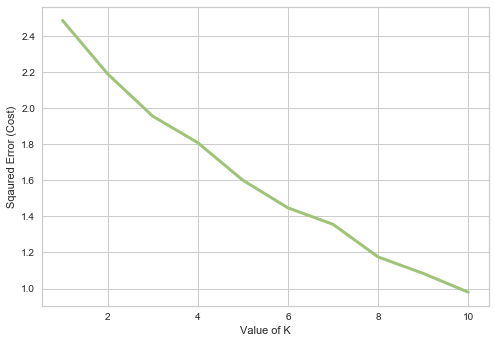

In [76]:

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters=i) 
    KM.fit(for_clusters) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 


It seems like lower values of k will provide optimum clustering since elbow point is at 2.

In [122]:
k = 2

model = KMeans(n_clusters=k, random_state=0).fit(for_clusters)
model.labels_

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [123]:
common_venues=common_venues.drop(columns=["Cluster Labels"])

In [124]:
# Add clustering labels
common_venues.insert(0, 'Cluster Labels', model.labels_.astype(int))

final = df_indtop100

# Merge venues_grouped with the DF with the Postal Codes selected
# to add latitude/longitude for each neighborhood group
final = final.join(common_venues.set_index('City'), on='city')

In [125]:
final.head(20)

,city,lat,lng,country,state,population,population_proper,Cluster Labels,Most Common Venue no. 1,Most Common Venue no. 2,Most Common Venue no. 3,Most Common Venue no. 4,Most Common Venue no. 5
0,Mumbai,18.987807,72.836447,India,Mahārāshtra,18978000.0,12691836.0,0.0,Indian Restaurant,Restaurant,Hotel,Ice Cream Shop,Café
1,Delhi,28.651952,77.231495,India,Delhi,15926000.0,7633213.0,1.0,Indian Restaurant,Hotel,Chinese Restaurant,Italian Restaurant,Café
2,Kolkata,22.562627,88.363044,India,West Bengal,14787000.0,4631392.0,1.0,Indian Restaurant,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Café
3,Chennai,13.084622,80.248357,India,Tamil Nādu,7163000.0,4328063.0,1.0,Indian Restaurant,Ice Cream Shop,Hotel,Pub,Café
4,Bengalūru,12.977063,77.587106,India,Karnātaka,6787000.0,5104047.0,1.0,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Coffee Shop
5,Hyderabad,17.384052,78.456355,India,Andhra Pradesh,6376000.0,3597816.0,1.0,Indian Restaurant,Hotel,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
6,Ahmadābād,23.025793,72.587265,India,Gujarāt,5375000.0,3719710.0,1.0,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Tea Room
7,Hāora,22.576882,88.318566,India,West Bengal,4841638.0,1027672.0,1.0,Hotel,Indian Restaurant,Café,Restaurant,BBQ Joint
8,Pune,18.513271,73.849852,India,Mahārāshtra,4672000.0,2935744.0,1.0,Indian Restaurant,Coffee Shop,Pizza Place,Café,Fast Food Restaurant
9,Sūrat,21.195944,72.830232,India,Gujarāt,3842000.0,2894504.0,1.0,Indian Restaurant,Café,Fast Food Restaurant,Pizza Place,Coffee Shop


We need to plot each cluster on the folium developed map. For this we require that all cities contain the cluster label

In [127]:
final['Cluster Labels'].isnull().any()

True

There are still some venues that contain no labels. We will drop these venues.

In [128]:
final = final.dropna(axis=0, subset=['Cluster Labels'])

In [129]:
final.shape

(46, 13)

We are clustering restaurants based in 46 cities.

In [130]:
#refining final for folium

# final = final.drop(columns=['population_proper'])
final = final.astype({'Cluster Labels': 'int32'})

In [131]:
final.head(20)

,city,lat,lng,country,state,population,population_proper,Cluster Labels,Most Common Venue no. 1,Most Common Venue no. 2,Most Common Venue no. 3,Most Common Venue no. 4,Most Common Venue no. 5
0,Mumbai,18.987807,72.836447,India,Mahārāshtra,18978000.0,12691836.0,0,Indian Restaurant,Restaurant,Hotel,Ice Cream Shop,Café
1,Delhi,28.651952,77.231495,India,Delhi,15926000.0,7633213.0,1,Indian Restaurant,Hotel,Chinese Restaurant,Italian Restaurant,Café
2,Kolkata,22.562627,88.363044,India,West Bengal,14787000.0,4631392.0,1,Indian Restaurant,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Café
3,Chennai,13.084622,80.248357,India,Tamil Nādu,7163000.0,4328063.0,1,Indian Restaurant,Ice Cream Shop,Hotel,Pub,Café
4,Bengalūru,12.977063,77.587106,India,Karnātaka,6787000.0,5104047.0,1,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Coffee Shop
5,Hyderabad,17.384052,78.456355,India,Andhra Pradesh,6376000.0,3597816.0,1,Indian Restaurant,Hotel,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
6,Ahmadābād,23.025793,72.587265,India,Gujarāt,5375000.0,3719710.0,1,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Tea Room
7,Hāora,22.576882,88.318566,India,West Bengal,4841638.0,1027672.0,1,Hotel,Indian Restaurant,Café,Restaurant,BBQ Joint
8,Pune,18.513271,73.849852,India,Mahārāshtra,4672000.0,2935744.0,1,Indian Restaurant,Coffee Shop,Pizza Place,Café,Fast Food Restaurant
9,Sūrat,21.195944,72.830232,India,Gujarāt,3842000.0,2894504.0,1,Indian Restaurant,Café,Fast Food Restaurant,Pizza Place,Coffee Shop


## Section 5 : Mapping clusters and analysing them

In this section we use Folium to map the clusters across the map of India and analyse the 3 clusters formes based on their values.

In [139]:
map_clusters = folium.Map(location=[latitude,longitude],zoom_start=5)

x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final['lat'], final['lng'], final['city'], final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster Analysis

#### Cluster 1 

In [136]:
final.loc[final['Cluster Labels'] == 0, final.columns[[0,1] + list(range(5, final.shape[1]))]].head(5)

,city,lat,population,population_proper,Cluster Labels,Most Common Venue no. 1,Most Common Venue no. 2,Most Common Venue no. 3,Most Common Venue no. 4,Most Common Venue no. 5
0,Mumbai,18.987807,18978000.0,12691836.0,0,Indian Restaurant,Restaurant,Hotel,Ice Cream Shop,Café
14,Patna,25.615379,2158000.0,1599920.0,0,Indian Restaurant,Fast Food Restaurant,Pizza Place,Hotel,Ice Cream Shop
18,Coimbatore,11.005547,1696000.0,959823.0,0,Indian Restaurant,Hotel,Pizza Place,Fast Food Restaurant,Café
21,Kalyān,19.243703,1576614.0,1576614.0,0,Indian Restaurant,Hotel,Fast Food Restaurant,Café,Restaurant
24,Nāsik,19.999963,1473000.0,1289497.0,0,Indian Restaurant,Hotel,Restaurant,Pizza Place,Fast Food Restaurant


This cluster seems to contain cities that have Indian Restaurants, Fast Food Restaurants, Pizza Places and Hotels as their most popular venues. In terms of population, apart from Mumbai, they are not that populated. Seems like the inhabitants don't explore much variety. 

#### Cluster 2

In [137]:
final.loc[final['Cluster Labels'] == 1, final.columns[[0,1] + list(range(5, final.shape[1]))]].head(10)

,city,lat,population,population_proper,Cluster Labels,Most Common Venue no. 1,Most Common Venue no. 2,Most Common Venue no. 3,Most Common Venue no. 4,Most Common Venue no. 5
1,Delhi,28.651952,15926000.0,7633213.0,1,Indian Restaurant,Hotel,Chinese Restaurant,Italian Restaurant,Café
2,Kolkata,22.562627,14787000.0,4631392.0,1,Indian Restaurant,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Café
3,Chennai,13.084622,7163000.0,4328063.0,1,Indian Restaurant,Ice Cream Shop,Hotel,Pub,Café
4,Bengalūru,12.977063,6787000.0,5104047.0,1,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Coffee Shop
5,Hyderabad,17.384052,6376000.0,3597816.0,1,Indian Restaurant,Hotel,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
6,Ahmadābād,23.025793,5375000.0,3719710.0,1,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Tea Room
7,Hāora,22.576882,4841638.0,1027672.0,1,Hotel,Indian Restaurant,Café,Restaurant,BBQ Joint
8,Pune,18.513271,4672000.0,2935744.0,1,Indian Restaurant,Coffee Shop,Pizza Place,Café,Fast Food Restaurant
9,Sūrat,21.195944,3842000.0,2894504.0,1,Indian Restaurant,Café,Fast Food Restaurant,Pizza Place,Coffee Shop
10,Mardānpur,26.430066,3162000.0,2823249.0,1,Pizza Place,Sandwich Place,Hotel,Ice Cream Shop,Indian Restaurant


In this second cluster, other restaurant categories like Chinese restaurants, Italian restaurants, Sandwich Places are seen to be popular options among the citizens. This cluster mostly contains most populated cities of India and we can clearly see that people here are very diverse in choosing their food eating hotspots. Even though Indian Restaurants take the major chunk as most popular venue in both clusters, this particular cluster has a bit more variety.


### Results

Indian Restaurants continues to be the heart of most Indian cities around the country, serving as the most popular choice. International cuisine options though present are very rare. 
Cafes and Fast Food restaurants are also some options frequented upon. So even though Indian Restaurants are top priority, we can easily say judging from the clusters that the cities are seeing a moving trend in making cafes and fast food restaurants among the more popular options.